# Solving the n-Queens Problem using Local Search

Points: 10

## The n-Queens Problem

__Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

__State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector of length $n$, each number representing for one column (from left to write) the row the queen is located in. We will call a state a "board."

__Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).

The optimization problem is to find the optimal arrangement $a^*$ of $n$ queens on the board:

$$a^* = \mathrm{argmin}_a [ \mathrm{conflicts}(a) ]$$

$$\text{s.t.}\ a \ \text{contains only one queen per column}$$

Note that for this problem there is always an arrangement $a^*$ with $\mathrm{conflicts}(a) = 0$. 

__Local move:__ Move one queen to a different position in its column.

## Helper functions


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n-1, size = n))


def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""
    
    board = np.array(board)
    
    n = len(board)
    conflicts = 0

    # check horizontal (we do not check vertical since the state space is restricted to one queen per col)
    for i in range(n): conflicts += math.comb(np.sum(board == i), 2)
    #print(f"Horizontal conflicts: {conflicts}")
    
    # check for each queen diagonally up and down (only to the right side of the queen)
    for j in range(n):
        q_up = board[j]
        q_down = board[j]
     
        for jj in range(j+1, n):
            q_up -= 1
            q_down += 1
            if board[jj] == q_up: conflicts += 1
            if board[jj] == q_down: conflicts += 1
        #print(f"Conflicts after queen {j}: {conflicts}")
       
    return(conflicts)
        

def show_board(board, cols = ['white', 'gray']):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: 1 and j are switched. Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = 48, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 2 conflicts.


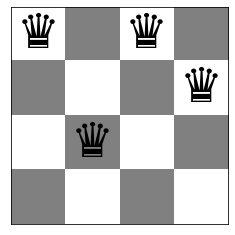

Queens (left to right) are at rows: [0 2 0 1]
Number of conflicts: 2


In [3]:
board = random_board(4)
show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


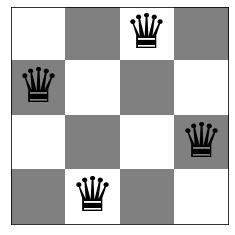

In [4]:
board = [1,3,0,2]
show_board(board)

## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

In [267]:
# board = random_board(4)
# print(board)

def all_next_moves(board):
    moves = []
    
    for q in range(len(board)):
        for i in range(0,len(board)):
            temp = board.copy()
            if i != board[q]:
                temp[q]=i
                moves.append(temp)
    
    return np.array(moves)

def next_best_move(moves):
    
    conflict = [conflicts(m) for m in moves]
    min_index = conflict.index(min(conflict))
    return moves[min_index]


moves = get_all_moves(board)
print(len(moves))
print(next_best_move(moves))

[2 2 0 0]
12
[2 2 0 3]


Board with 1 conflicts.


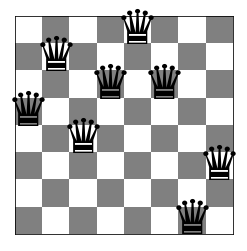

In [516]:
def SAHC(board, debug = False):
    n = len(board)
    curr_b = board.copy()
    curr_conflict = conflicts(curr_b)
    if debug: print(f"initial conflicts: {curr_conflict}")
    if debug:show_board(curr_b)
    
    while(1):
        # get the best local moves
        
        next_moves = all_next_moves(curr_b)
        new_board = next_best_move(next_moves)
        new_conflict = conflicts(new_board)
        
        if new_conflict < curr_conflict:
            curr_b = new_board
            curr_conflict = new_conflict
            if debug: print(f"new conflict: {curr_conflict}")
            if debug: show_board(curr_b)
                
        else:
            return curr_b
        

board = random_board(8)
show_board(SAHC(board,debug=False))

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend hill climbing will often end up in local optima. Restart the algorithm up to 100 times with a random board to find a better (hopefully optimal) solution.   

Board with 0 conflicts.


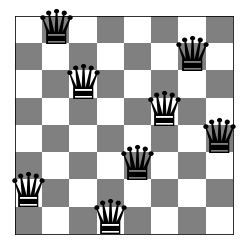

In [512]:
def SAHC_random_start(board,start_count=100,debug=False):
    curr = board
    curr_conflict = conflicts(curr)
    
    for i in range(start_count):
        new_start = random_board(len(board))
        new_board = SAHC(new_start)
        new_conflict = conflicts(new_board)
        
        # global optimal 
        if curr_conflict == 0:
            return curr_b
        
        if new_conflict < curr_conflict:
            curr_b = new_board
            curr_conflict = new_conflict
            if debug: print(f"new conflict: {curr_conflict}")
            if debug: show_board(curr_b)
        
    return curr_b

board = random_board(8)
show_board(SAHC_random_start(board))

## Stochastic Hill Climbing [1 Point]

Chooses randomly from among all uphill moves.

Board with 2 conflicts.


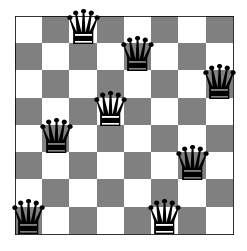

In [509]:
def random_uphill_move(board, threshold):
    
    moves = all_next_moves(board)
    uphill_moves = [m for m in moves if conflicts(m) < threshold]
    
    #return orignal move if no better move avaiable
    if len(uphill_moves)== 0:
        return board
    else:
        return uphill_moves[np.random.choice(len(uphill_moves))]


def SHC(board, debug = False):
    n = len(board)
    curr_b = board.copy()
    curr_conflict = conflicts(curr_b)
    if debug: print(f"initial conflicts: {curr_conflict}")
    if debug:show_board(curr_b)
    
    while(1):
        # get the best local moves
        new_board = random_uphill_move(curr_b, curr_conflict)
        new_conflict = conflicts(new_board)
        
        if new_conflict < curr_conflict:
            curr_b = new_board
            curr_conflict = new_conflict
            if debug: print(f"new conflict: {curr_conflict}")
            if debug: show_board(curr_b)
                
        else:
            return curr_b
        

board = random_board(8)
show_board(SHC(board,debug=False))


## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

initial conflicts: 4
step: 1 - new conflict: 3
step: 94 - new conflict: 2
step: 98 - new conflict: 1
step: 1099 - no improvement for 1000 steps.
Board with 6 conflicts.


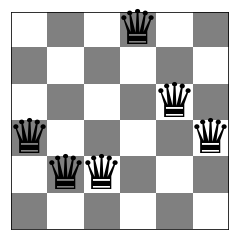

In [532]:
def random_move(board):
    # random queen and then random row
    random_queen = np.random.randint(0,len(board))
    
    #exclude original step
    row = [i for i in range(0,len(board)) if i != board[random_queen]]
    board[random_queen] = np.random.choice(row)

    return board

# print(random_move([0,0,0,1]))

def FCHC(board=None, max_steps = 10000, 
         stop_after = 1000, debug= False):

    curr_b = board
    curr_conflict = conflicts(curr_b)
    if debug: print(f"initial conflicts: {curr_conflict}")
    
    last_better_step = 0
    
    for s in range(max_steps):
        
        # decide which schema
        new_board = random_move(curr_b)
        new_conflict = conflicts(new_board)
        
        if new_conflict < curr_conflict:
            curr_b = new_board
            curr_conflict = new_conflict
            last_better_step = s
            if debug: print(f"step: {s} - new conflict: {curr_conflict}")
#             show_board(curr_b)
        
        # global optimal
        if curr_conflict == 0:
            break
        
        if s - last_better_step > stop_after:
            if debug: print(f"step: {s} - no improvement for {stop_after} steps.")
            break
        
    return(curr_b)

board = random_board(6)
nb = FCHC(board,debug=True)
show_board(nb)

## Simulated Annealing [2 Points]

You have to experiment with the annealing schedule.

initial conflicts: 8
step: 0 	 temp: 28.000 	 deltaE: +2.000 	 new conflcit: 10.000
step: 1 	 temp: 27.720 	 deltaE: -4.000 	 new conflcit: 6.000
step: 2 	 temp: 27.443 	 deltaE: +3.000 	 new conflcit: 9.000
step: 3 	 temp: 27.168 	 deltaE: -2.000 	 new conflcit: 7.000
step: 4 	 temp: 26.897 	 deltaE: +0.000 	 new conflcit: 7.000
step: 5 	 temp: 26.628 	 deltaE: +3.000 	 new conflcit: 10.000
step: 6 	 temp: 26.361 	 deltaE: +2.000 	 new conflcit: 12.000
step: 7 	 temp: 26.098 	 deltaE: -2.000 	 new conflcit: 10.000
step: 8 	 temp: 25.837 	 deltaE: -1.000 	 new conflcit: 9.000
step: 9 	 temp: 25.578 	 deltaE: -1.000 	 new conflcit: 8.000
step: 10 	 temp: 25.323 	 deltaE: +4.000 	 new conflcit: 12.000
step: 11 	 temp: 25.069 	 deltaE: -1.000 	 new conflcit: 11.000
step: 12 	 temp: 24.819 	 deltaE: +1.000 	 new conflcit: 12.000
step: 13 	 temp: 24.571 	 deltaE: -1.000 	 new conflcit: 11.000
step: 14 	 temp: 24.325 	 deltaE: +1.000 	 new conflcit: 12.000
step: 15 	 temp: 24.082 	 deltaE: -

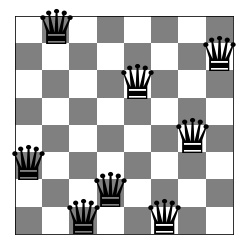

In [505]:
def SA(board=None, T0=None,
       alpha = 0.99, epsilon=1e-3, debug = False):

    if not board is None:
        curr_b = board
    else:
        curr_b = random_board(n)
        
    n = len(curr_b)
    curr_conflict = conflicts(curr_b)
    if debug: print(f"initial conflicts: {curr_conflict}")
    
    # set T0 is max conflict or curr conflict
    if T0 is None:
        T0 = n*(n-1)/2
    else: 
        T0 = curr_conflict
    
    T = T0
    t = 0
    
    while T > epsilon:
        
        #update T
        T = T0 * alpha ** t
        
        new_board = random_move(curr_b)
        new_conflict = conflicts(new_board)
        deltaE = new_conflict - curr_conflict
        
        # global optimal
        if curr_conflict == 0:
            break
        
        if deltaE < 0 or np.random.rand() < math.exp(-deltaE/T): 
            curr_b = new_board
            curr_conflict = new_conflict
            if debug: print(f"step: {t} \t temp: {T:5.3f} \t deltaE: {deltaE:+3.3f} \t new conflcit: {curr_conflict:3.3f}")
            
        t = t + 1
        
    return(curr_b)


board = random_board(8)
# SA(board,debug=True)
show_board(SA(board,alpha = 0.99,debug=True))


## Compare Performance [2 Points]

Use runtime, scalability, and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [10]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.2281665802001953 milliseconds


In [11]:
# Code and results go here

## Bonus: Genetic Algorithm [+1 Point]

In [12]:
# Code goes here